### importing libraries

In [1]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### importing libraries

In [2]:
### importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style


### Reading data

In [3]:
df=pd.read_csv("data_cleaned.csv")

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,NM,0,50,1,0,0,0,1,501-1000
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,MD,0,39,1,0,0,0,0,10000+
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,FL,1,13,1,0,1,0,1,501-1000
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,WA,1,58,1,0,0,0,0,1001-5000
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,NY,1,25,1,0,0,0,1,51-200


In [5]:
### displaying columns
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'range-salary', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'age',
       'python_skill', 'rstudio_skill', 'spark_skill', 'aws_skill',
       'excel_skill', 'size_number'],
      dtype='object')

### simplifying title

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    if 'data engineer' in title.lower():
        return 'data engineer'
    if 'analyst' in title.lower():
        return 'analyst'
    if 'machine learning' in title.lower():
        return 'mle'
    if 'manager' in title.lower():
        return 'manager'
    if 'director' in title.lower():
        return 'director'
    
    else:
        return 'na'

### simplifiying seniority title

In [7]:
def seniority(title):
    if 'sr' in title.lower() or 'senior'in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower()  or 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df["job_simp"]=df["Job Title"].apply(title_simplifier)

In [9]:
df["job_simp"].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [10]:
df["seniority"]=df["Job Title"].apply(seniority)

In [11]:
df["seniority"].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [12]:
### job description length
df["desc_len"]=df["Job Description"].apply(len)

In [13]:
### counting the number of competitors
df['Competitors']=df['Competitors'].apply(lambda x: x.split(",") if x!='-1' else 0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  range-salary       742 non

In [15]:
### hourly wage to annual
df['min_salary']=df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)

### exploring data 

In [16]:
#### displaying all columns
pd.set_option("display.max_columns",None)

In [17]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53-91,53,91,72.0,NM,0,50,1,0,0,0,1,501-1000,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63-112,63,112,87.5,MD,0,39,1,0,0,0,0,10000+,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80-90,80,90,85.0,FL,1,13,1,0,1,0,1,501-1000,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"[Oak Ridge National Laboratory, National Rene...",0,0,56-97,56,97,76.5,WA,1,58,1,0,0,0,0,1001-5000,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"[Commerce Signals, Cardlytics, Yodlee]",0,0,86-143,86,143,114.5,NY,1,25,1,0,0,0,1,51-200,data scientist,na,2728


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  range-salary       742 non

### numerical variables:

In [19]:
### numerical variables:
numeric_variables=['Rating','avg_salary','age','desc_len']

In [20]:
style.use("ggplot")

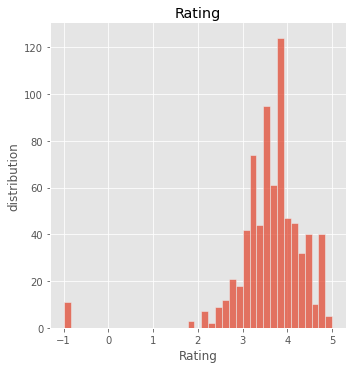

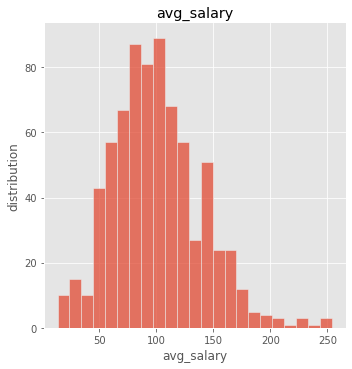

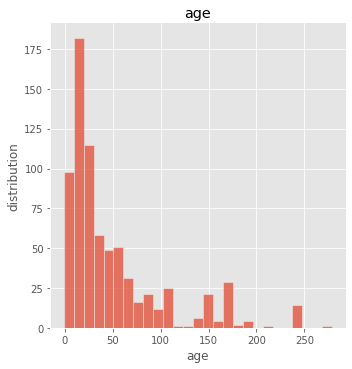

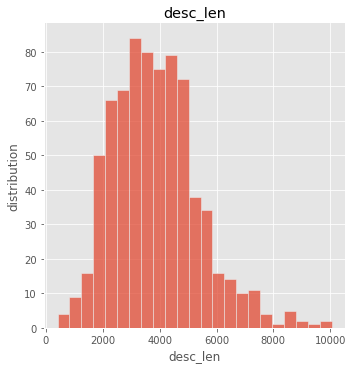

In [21]:
#### plotting histograms
for variable in numeric_variables :
    sns.displot(df[variable])
    plt.title(variable)
    plt.ylabel("distribution")
    plt.show()

In [23]:
#### summarizing the results
df[numeric_variables].describe()

,Rating,avg_salary,age,desc_len
count,742.000000,742.000000,742.000000,742.000000
mean,3.618868,100.626011,49.389488,3869.545822
std,0.801210,38.855948,53.962906,1521.495868
min,-1.000000,13.500000,-1.000000,407.000000
25%,3.300000,73.500000,14.000000,2801.000000
50%,3.700000,97.500000,27.000000,3731.000000
75%,4.000000,122.500000,62.000000,4740.000000
max,5.000000,254.000000,279.000000,10051.000000


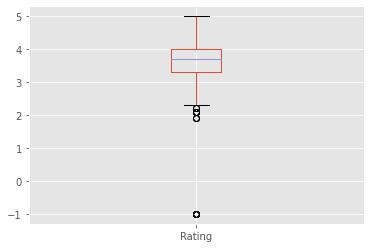

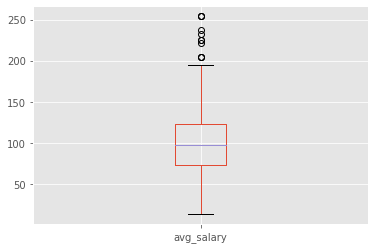

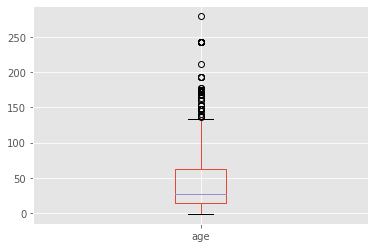

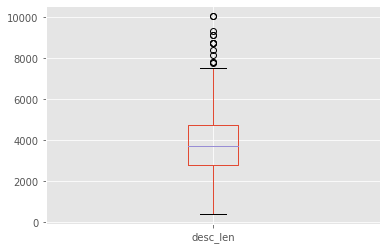

In [24]:
### plotting boxplots
for variable in numeric_variables:
    df[[variable]].boxplot()
    plt.show()

**observation**:there is some outliers

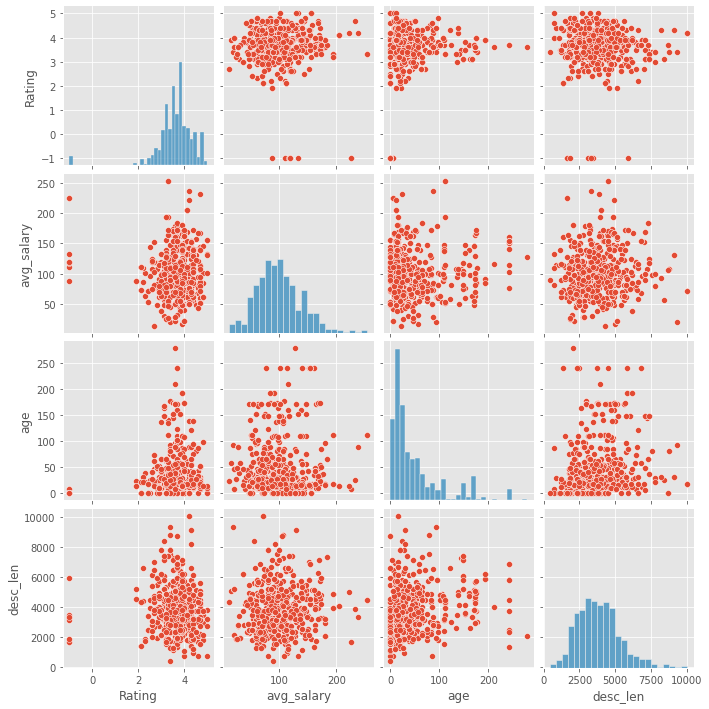

In [25]:
#### relation between variables:
sns.pairplot(df[numeric_variables])

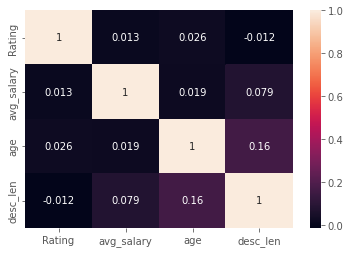

In [26]:
sns.heatmap(df[numeric_variables].corr(),annot=True)

### Categorical variables

In [27]:
df.size_number.unique()

array(['501-1000', '10000+', '1001-5000', '51-200', '201-500',
       '5001-10000', '1-50', 'Unknown', '-1'], dtype=object)

In [28]:
df.size_number.value_counts()

1001-5000     150
501-1000      134
10000+        130
201-500       117
51-200         94
5001-10000     76
1-50           31
Unknown         9
-1              1
Name: size_number, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  range-salary       742 non

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'range-salary', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'age',
       'python_skill', 'rstudio_skill', 'spark_skill', 'aws_skill',
       'excel_skill', 'size_number', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [31]:
### categorical_variables
categoric_variables=['Location','Headquarters','size_number','job_simp','python_skill', 'rstudio_skill', 'spark_skill', 'aws_skill',
       'excel_skill','job_state', 'same_state','Type of ownership', 'Industry', 'Sector', 'Revenue', 'seniority']

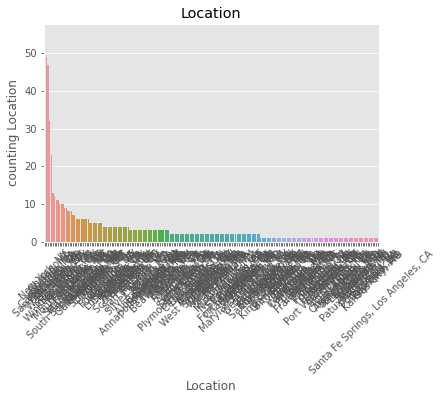

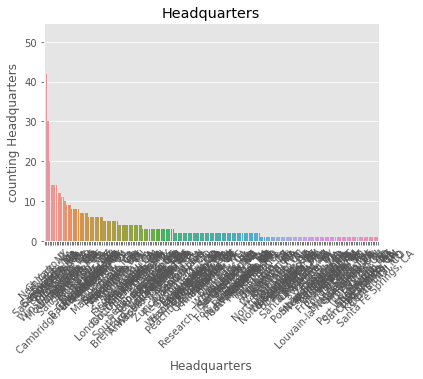

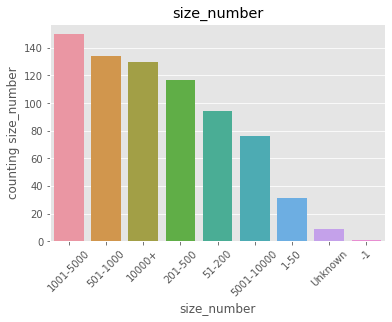

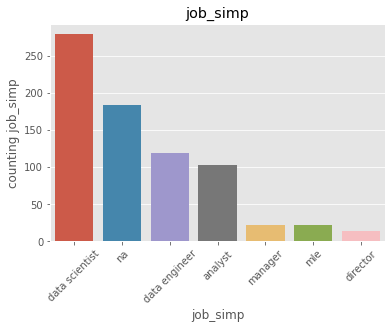

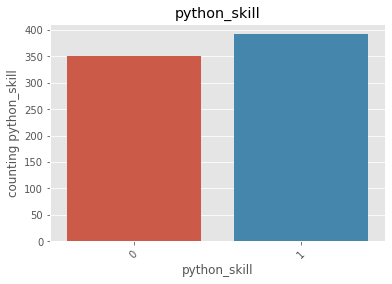

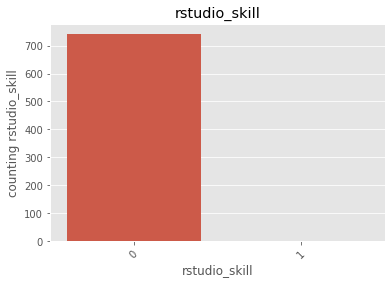

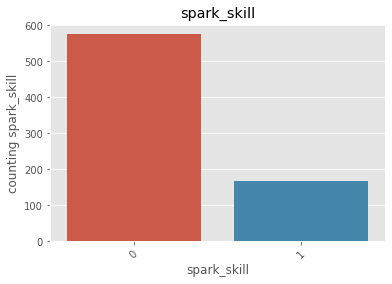

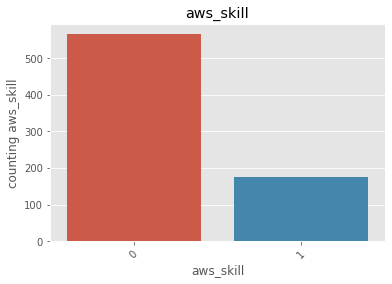

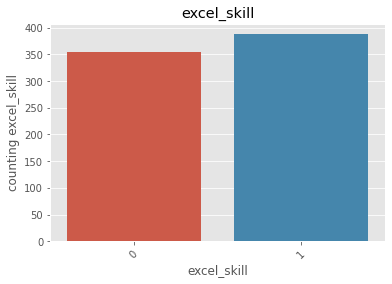

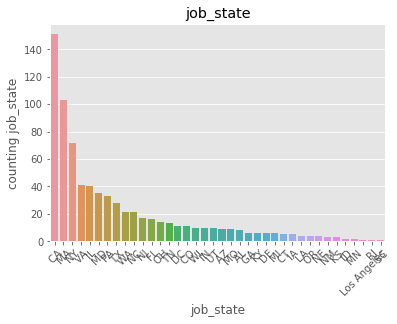

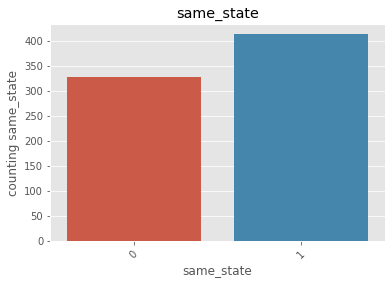

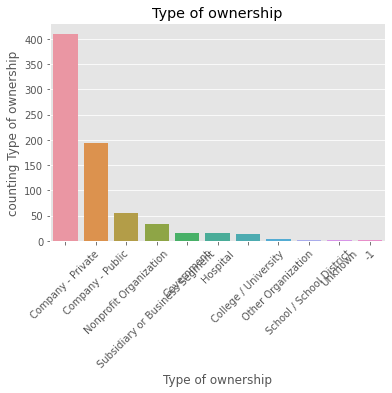

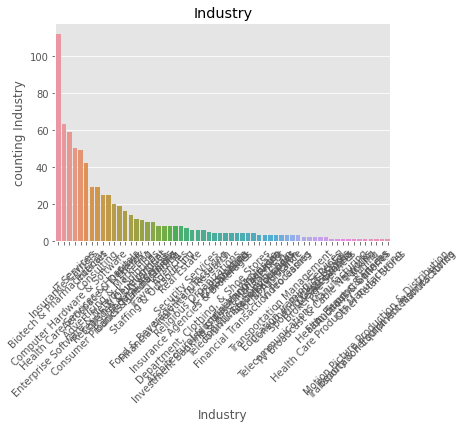

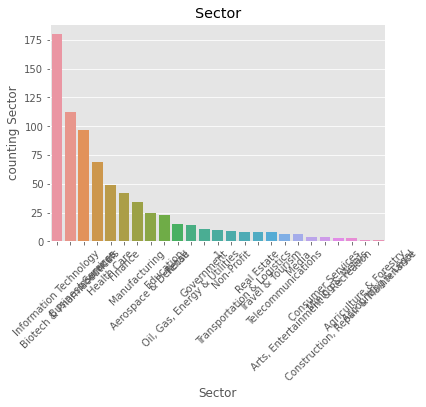

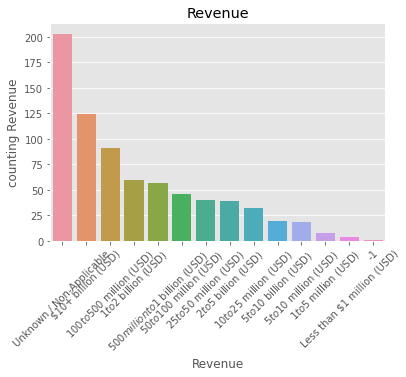

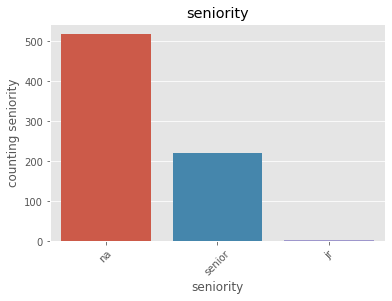

In [32]:
for variable in categoric_variables:
    values=df[variable].value_counts()
    indexes=values.index
    sns.barplot(x=indexes,y=values)
    plt.title(variable)
    plt.xlabel(variable)
    plt.xticks(rotation = 45)
    plt.ylabel(f"counting {variable}")
    plt.show()
    

#### relation between variables and avg_salary


In [33]:
### job_simp
df.groupby("job_simp")["avg_salary"].mean()

job_simp
analyst            65.857843
data engineer     105.403361
data scientist    117.564516
director          168.607143
manager            84.022727
mle               126.431818
na                 84.853261
Name: avg_salary, dtype: float64

In [34]:
### job_simp and seniority
pd.pivot_table(df,index=["job_simp","seniority"],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [35]:
### job_state
pd.pivot_table(df,index="job_state",values="avg_salary").sort_values(by="avg_salary",ascending=False)

,avg_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
Los Angeles,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [36]:
#### skills python,excel,aws,rstudio,spark
pd.pivot_table(df,index="python_skill",values="avg_salary")

,avg_salary
python_skill,
0,87.155714
1,112.653061


In [37]:
pd.pivot_table(df,index="rstudio_skill",values="avg_salary")

,avg_salary
rstudio_skill,
0,100.636977
1,92.500000


In [38]:
pd.pivot_table(df,index="excel_skill",values="avg_salary")

,avg_salary
excel_skill,
0,102.953390
1,98.502577


In [39]:
pd.pivot_table(df,index="aws_skill",values="avg_salary")

,avg_salary
aws_skill,
0,96.915194
1,112.559659


In [40]:
pd.pivot_table(df,index="spark_skill",values="avg_salary")

,avg_salary
spark_skill,
0,96.931304
1,113.347305


In [41]:
pd.pivot_table(df,index="size_number",values="avg_salary").sort_values(by="avg_salary",ascending=False)

,avg_salary
size_number,
Unknown,128.111111
-1,117.500000
10000+,112.230769
51-200,111.351064
1-50,102.306452
201-500,100.247863
5001-10000,96.552632
1001-5000,92.916667
501-1000,90.753731


In [42]:
###rating
pd.pivot_table(df,index="Rating",values="avg_salary").sort_values(by="avg_salary",ascending=False)

,avg_salary
Rating,
-1.0,136.181818
5.0,134.700000
2.5,120.000000
4.5,117.714286
4.1,116.368421
3.9,113.071429
2.6,109.083333
4.4,108.606061
3.2,105.500000


In [43]:
print(categoric_variables)

['Location', 'Headquarters', 'size_number', 'job_simp', 'python_skill', 'rstudio_skill', 'spark_skill', 'aws_skill', 'excel_skill', 'job_state', 'same_state', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'seniority']


In [44]:
print(df["Revenue"].unique())

['$50 to $100 million (USD)' '$2 to $5 billion (USD)'
 '$100 to $500 million (USD)' '$500 million to $1 billion (USD)'
 'Unknown / Non-Applicable' '$1 to $2 billion (USD)'
 '$25 to $50 million (USD)' '$10+ billion (USD)' '$1 to $5 million (USD)'
 '$10 to $25 million (USD)' '$5 to $10 billion (USD)'
 'Less than $1 million (USD)' '$5 to $10 million (USD)' '-1']


In [45]:
import re

In [46]:
#### extracting "$50 to $100" from the text
df["Revenue"].apply(lambda x:re.match(r'(\$\d+\sto\s\$\d+)', x).group() if re.match(r'(\$\d+\sto\s\$\d+)', x) else x )

0                           $50 to $100
1                              $2 to $5
2                          $100 to $500
3      $500 million to $1 billion (USD)
4              Unknown / Non-Applicable
                     ...               
737                  $10+ billion (USD)
738                        $100 to $500
739            Unknown / Non-Applicable
740                           $5 to $10
741                         $50 to $100
Name: Revenue, Length: 742, dtype: object

In [47]:
### 'Type of ownership', 'Industry', 'Sector', 'Revenue'
company_feat=['Type of ownership', 'Industry', 'Sector', 'Revenue']
for feat in company_feat:
    print(pd.pivot_table(df,index=feat,values="avg_salary").sort_values(by="avg_salary",ascending=False))

                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government                       84.300000
School / School District         77.750000
Other Organization               77.500000
Nonprofit Organization           68.281818
Hospital                         54.000000
Unknown                          39.500000
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Brokerage Services                        129.000000
Auctions & Galler

### wordcloud

In [48]:
! pip install wordcloud nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [65]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'range-salary', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'age',
       'python_skill', 'rstudio_skill', 'spark_skill', 'aws_skill',
       'excel_skill', 'size_number', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [66]:
words = " ".join(df['Job Description'])

In [67]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [68]:
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

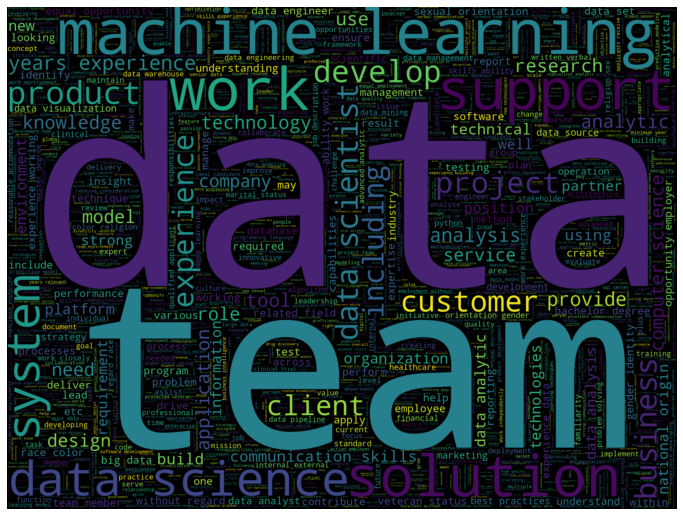

In [73]:
wc= WordCloud(background_color="black", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2000, height = 1500)
wc.generate(text)

plt.figure(figsize=[12,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
### loading data to a csv file
df.to_csv("eda_glassdoor.csv",index=False)